Iniciando a classificação do dataset Padronizado

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

df_scaled = pd.read_parquet('../data/scaled_ACC_INTAKES_OUTCOMES.parquet')

df_scaled.head()


,age_upon_outcome,animal_id_outcome,date_of_birth,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,...,is_mix_breed,processed_color,color_Black,color_Brown/Chocolate,color_Gray/Blue,color_Other_Colors,color_Patterned,color_Red/Orange,color_White,color_Yellow/Gold/Cream
0,10 years,A047759,02/04/2004 00:00,3650,10.0,"(7.5, 10.0]",07/04/2014 15:12,4,2014,2014-04,...,0,Tricolor,False,False,False,False,True,False,False,False
1,14 years,A197810,21/01/2000 00:00,5110,14.0,"(12.5, 15.0]",22/12/2014 15:23,12,2014,2014-12,...,1,multi,False,False,False,True,False,False,False,False
2,16 years,A200922,03/10/1997 00:00,5840,16.0,"(15.0, 17.5]",22/11/2013 09:44,11,2013,2013-11,...,1,multi,False,False,False,True,False,False,False,False
3,14 years,A208755,27/04/2000 00:00,5110,14.0,"(12.5, 15.0]",17/02/2015 16:25,2,2015,2015-02,...,1,multi,False,False,False,True,False,False,False,False
4,17 years,A210457,01/06/1999 00:00,6205,17.0,"(15.0, 17.5]",07/10/2016 12:34,10,2016,2016-10,...,0,multi,False,False,False,True,False,False,False,False


Denifir as features que serão utilizadas na classificação do dataset Padronizado.

In [2]:
X = df_scaled[[
    "dob_year_scaled", "age_upon_intake_(days)_scaled", "age_upon_intake_(years)_scaled", "intake_month_scaled",
    "intake_year_scaled", "intake_number_scaled", "age_upon_outcome_(days)_scaled", "age_upon_outcome_(years)_scaled",
    "outcome_month_scaled", "outcome_year_scaled", "outcome_number_scaled", "time_in_shelter_days_scaled",
    "outcome_subtype_Aggressiv", "outcome_subtype_At Vet   ", "outcome_subtype_Barn     ", "outcome_subtype_Behavior ",
    "outcome_subtype_Court/Inv", "outcome_subtype_Enroute  ", "outcome_subtype_Foster   ", "outcome_subtype_In Foster",
    "outcome_subtype_In Kennel", "outcome_subtype_In Surger", "outcome_subtype_Medical  ", "outcome_subtype_Offsite  ",
    "outcome_subtype_Partner  ", "outcome_subtype_Possible ", "outcome_subtype_Rabies Ri", "outcome_subtype_SCRP     ",
    "outcome_subtype_Snr      ", "outcome_subtype_Suffering", "outcome_subtype_Underage ",
    "sex_upon_outcome_Intact Female", "sex_upon_outcome_Intact Male  ", "sex_upon_outcome_Neutered Male",
    "sex_upon_outcome_Spayed Female", "sex_upon_outcome_Unknown      ", "outcome_weekday_Friday   ",
    "outcome_weekday_Monday   ", "outcome_weekday_Saturday ", "outcome_weekday_Sunday   ", "outcome_weekday_Thursday ",
    "outcome_weekday_Tuesday  ", "outcome_weekday_Wednesday", "animal_type_Bir", "animal_type_Cat",
    "animal_type_Dog", "animal_type_Oth", "intake_condition_Aged   ", "intake_condition_Feral  ",
    "intake_condition_Injured", "intake_condition_Normal ", "intake_condition_Nursing", "intake_condition_Other  ",
    "intake_condition_Pregnan", "intake_condition_Sick   ", "intake_type_Euthanasia Request",
    "intake_type_Owner Surrender   ", "intake_type_Public Assist     ", "intake_type_Stray             ",
    "intake_type_Wildlife          ", "sex_upon_intake_Intact Female", "sex_upon_intake_Intact Male  ",
    "sex_upon_intake_Neutered Male", "sex_upon_intake_Spayed Female", "sex_upon_intake_Unknown      ",
    "intake_weekday_Friday   ", "intake_weekday_Monday   ", "intake_weekday_Saturday ", "intake_weekday_Sunday   ",
    "intake_weekday_Thursday ", "intake_weekday_Tuesday  ", "intake_weekday_Wednesday",
    "age_upon_outcome_age_group_encoded", "age_upon_intake_age_group_encoded", "is_mix_breed", "color_Black",
    "color_Brown/Chocolate", "color_Gray/Blue", "color_Other_Colors", "color_Patterned", "color_Red/Orange",
    "color_White", "color_Yellow/Gold/Cream"
]]

Definindo variáveis alvo:

In [4]:
y = df_scaled[["outcome_type_Adoption       ", "outcome_type_Euthanasia     ", "outcome_type_Transfer       "]]


Verificando o balanceamento entre as classes alvo:

In [8]:
count_adoption = y["outcome_type_Adoption       "].value_counts()
count_euthanasia = y["outcome_type_Euthanasia     "].value_counts()
count_transfer = y["outcome_type_Transfer       "].value_counts()

print("Quantidade de animais adotados:")
print(f"Adotados: {count_adoption[True]}")
print(f"Não adotados: {count_adoption[False]}\n")

print("Quantidade de animais eutanasiados:")
print(f"Eutanasiados: {count_euthanasia[True]}")
print(f"Não eutanasiados: {count_euthanasia[False]}\n")

print("Quantidade de animais transferidos:")
print(f"Transferidos: {count_transfer[True]}")
print(f"Não transferidos: {count_transfer[False]}\n")


Quantidade de animais adotados:
Adotados: 5806
Não adotados: 28552

Quantidade de animais eutanasiados:
Eutanasiados: 5907
Não eutanasiados: 28451

Quantidade de animais transferidos:
Transferidos: 22044
Não transferidos: 12314



Classe Majoritária: A classe "Transferidos" é claramente a maior, representando 64,1% dos casos.

Classes Menores: As classes "Adotados" e "Eutanasiados" são quase iguais em proporção, ambas em torno de 17%.

Divisão do Dataset em Treino e Teste:
Vamos dividir o dataset usando uma proporção de 70% para treino e 30% para teste.

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


X_train.shape, X_test.shape, y_train.shape, y_test.shape


((24050, 83), (10308, 83), (24050, 3), (10308, 3))

Aplicação do SMOTE no conjunto de treino

In [11]:
import numpy as np

# Converter as três colunas de classes em uma única coluna categórica
y_train_combined = y_train.idxmax(axis=1)

# Aplicar SMOTE ao conjunto de treino
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train_combined)

# Verificar o balanceamento após aplicar SMOTE
print("Balanceamento após SMOTE:")
print(y_train_balanced.value_counts())


Balanceamento após SMOTE:
outcome_type_Euthanasia         15387
outcome_type_Transfer           15387
outcome_type_Adoption           15387
Name: count, dtype: int64


Treinando o modelo Random Forest:

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Treinar o modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_balanced, y_train_balanced)

# Fazer previsões no conjunto de teste
y_pred = rf_model.predict(X_test)

# Como `y_test` ainda está nas três colunas separadas, precisamos combiná-las como fizemos no conjunto de treino
y_test_combined = y_test.idxmax(axis=1)

# Avaliar o modelo
print("Matriz de Confusão:")
print(confusion_matrix(y_test_combined, y_pred))

print("\nRelatório de Classificação:")
print(classification_report(y_test_combined, y_pred, target_names=['Adoption', 'Euthanasia', 'Transfer']))


Matriz de Confusão:
[[1861    5    3]
 [   4 1778    0]
 [   1    0 6656]]

Relatório de Classificação:
              precision    recall  f1-score   support

    Adoption       1.00      1.00      1.00      1869
  Euthanasia       1.00      1.00      1.00      1782
    Transfer       1.00      1.00      1.00      6657

    accuracy                           1.00     10308
   macro avg       1.00      1.00      1.00     10308
weighted avg       1.00      1.00      1.00     10308



Treinando o modelo SVM

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Treinar o modelo SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_train_balanced, y_train_balanced)

# Fazer previsões no conjunto de teste
y_pred_svm = svm_model.predict(X_test)

# Avaliar o modelo
print("Matriz de Confusão:")
print(confusion_matrix(y_test_combined, y_pred_svm))

print("\nRelatório de Classificação:")
print(classification_report(y_test_combined, y_pred_svm, target_names=['Adoption', 'Euthanasia', 'Transfer']))


Matriz de Confusão:
[[1865    3    1]
 [  11 1771    0]
 [   9    0 6648]]

Relatório de Classificação:
              precision    recall  f1-score   support

    Adoption       0.99      1.00      0.99      1869
  Euthanasia       1.00      0.99      1.00      1782
    Transfer       1.00      1.00      1.00      6657

    accuracy                           1.00     10308
   macro avg       1.00      1.00      1.00     10308
weighted avg       1.00      1.00      1.00     10308



Para validar se tá acontecendo overfitting, usaremos a técnica de Validação Cruzada (cross-validation).

Os dados de treino serão divididos em K partes (ou "folds"). O modelo é treinado em K-1 partes e validado na parte restante, repetindo isso K vezes. O desempenho é então avaliado pela média dos resultados.

In [14]:
from sklearn.model_selection import cross_val_score

# Validação cruzada com 5-folds para Random Forest
rf_cv_scores = cross_val_score(RandomForestClassifier(random_state=42), X_train_balanced, y_train_balanced, cv=5)
print("Random Forest Cross-Validation Scores:", rf_cv_scores)
print("Random Forest Mean Cross-Validation Score:", rf_cv_scores.mean())

# Validação cruzada com 5-folds para SVM
svm_cv_scores = cross_val_score(SVC(random_state=42), X_train_balanced, y_train_balanced, cv=5)
print("\nSVM Cross-Validation Scores:", svm_cv_scores)
print("SVM Mean Cross-Validation Score:", svm_cv_scores.mean())


Random Forest Cross-Validation Scores: [0.99750894 0.99945841 1.         1.         0.99978336]
Random Forest Mean Cross-Validation Score: 0.9993501406209848

SVM Cross-Validation Scores: [0.99772555 0.99913345 0.99891681 0.99956672 0.99902513]
SVM Mean Cross-Validation Score: 0.9988735328087163


Random Forest:
Scores: [0.9975, 0.9994, 1.00, 1.00, 0.9997]
Média dos Scores: 0.9993
SVM:
Scores: [0.9977, 0.9991, 0.9989, 0.9995, 0.9990]
Média dos Scores: 0.9989
Interpretação:
Alta Consistência: Ambos os modelos mostram scores consistentemente altos em todas as dobras da validação cruzada, o que indica que o desempenho é estável e não depende excessivamente de um subconjunto específico dos dados de treino.
Generalização Sólida: As médias dos scores de validação cruzada (0.9993 para Random Forest e 0.9989 para SVM) são muito próximas da acurácia observada no conjunto de teste, sugerindo que os modelos estão generalizando bem e não estão sobreajustados aos dados de treino.

Implementando o SHAP no modelo Random Forest:

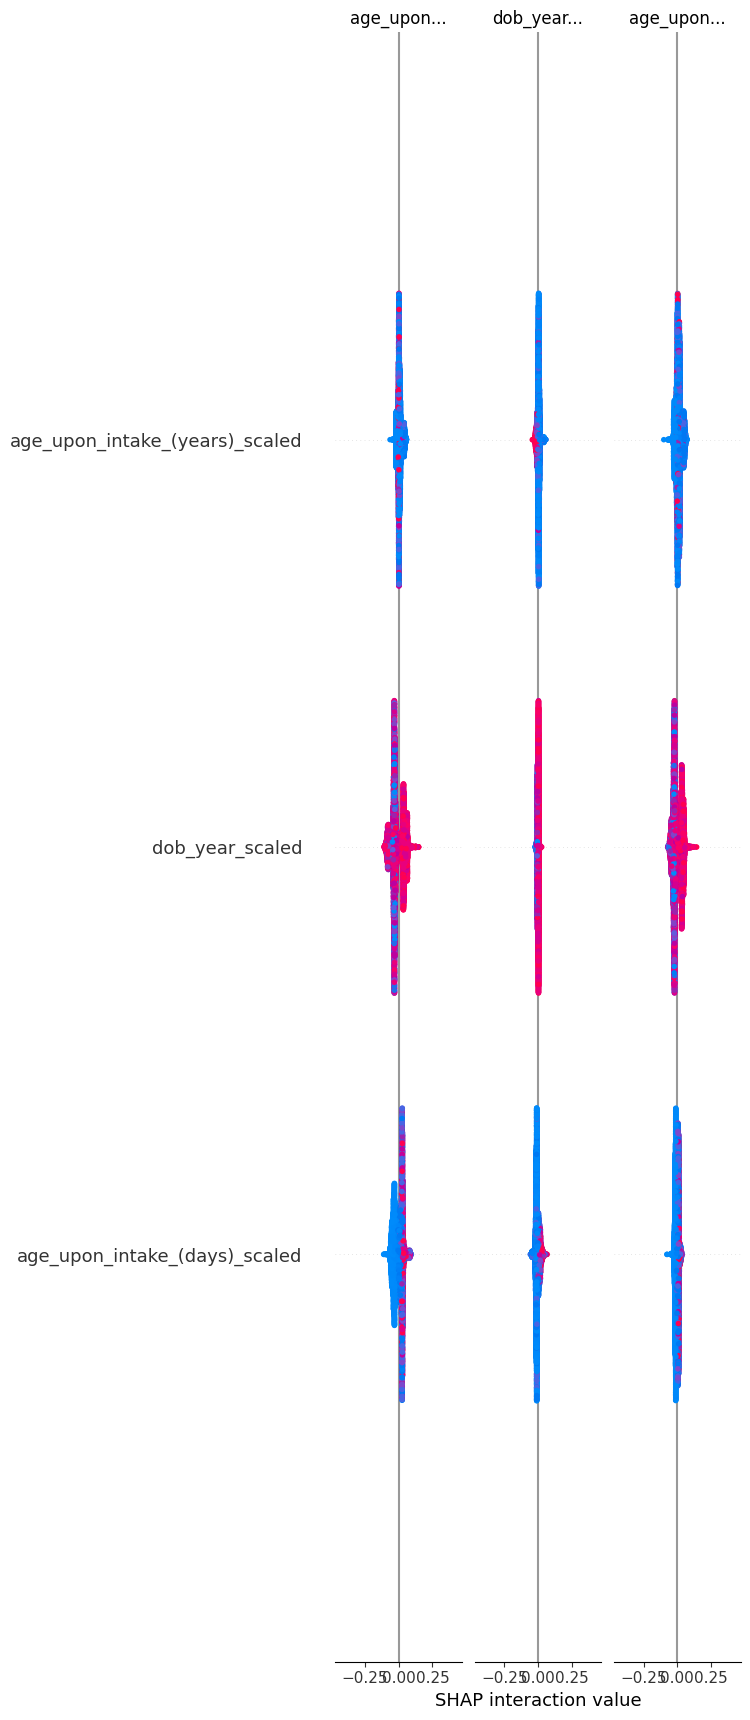

In [17]:
import shap

explainer = shap.TreeExplainer(rf_model)

# Calcular os valores SHAP para o conjunto de teste
shap_values = explainer.shap_values(X_test)

# Visualizar o gráfico de resumo (summary plot) para as três classes
# Gerar o gráfico de resumo mais interpretável
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns, max_display=20)


